# Desempenho de funcionário

Esse projeto será desenvolvido com foco em ampliar o conhecimento sobre inteligência artificial. Com o objetivo de analisar e informar sobre o desempenho de um funcionário na empresa, foi escolhido um dataset fictício que contém informações de funcionários.
- [x] Exploração dos dados;
- [] Pré processamento dos dados;
- [] Modelagem;
- [] Treinamento e avaliação;
- [] Ajustes e otimização;
- [] Visualização de Resultados.

## Implementação

### Importando bibliotecas

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
df = pd.read_csv('./dataset/info_funcionarios.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
df.sample(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
151,35,No,Travel_Rarely,662,Sales,1,5,Marketing,1,204,3,Male,94,3,3,Sales Executive,2,Married,7295,11439,1,Y,No,13,3,1,80,2,10,3,3,10,8,0,6
51,28,Yes,Travel_Rarely,1434,Research & Development,5,4,Technical Degree,1,65,3,Male,50,3,1,Laboratory Technician,3,Single,3441,11179,1,Y,Yes,13,3,3,80,0,2,3,2,2,2,2,2
1421,47,No,Non-Travel,1162,Research & Development,1,1,Medical,1,2000,3,Female,98,3,3,Research Director,2,Married,11957,17231,0,Y,No,18,3,1,80,2,14,3,1,13,8,5,12
140,32,Yes,Travel_Rarely,1033,Research & Development,9,3,Medical,1,190,1,Female,41,3,1,Laboratory Technician,1,Single,4200,10224,7,Y,No,22,4,1,80,0,10,2,4,5,4,0,4
621,36,No,Travel_Rarely,928,Sales,1,2,Life Sciences,1,857,2,Male,56,3,2,Sales Executive,4,Married,6201,2823,1,Y,Yes,14,3,4,80,1,18,1,2,18,14,4,11
803,34,No,Non-Travel,697,Research & Development,3,4,Life Sciences,1,1115,3,Male,40,2,1,Research Scientist,4,Married,2979,22478,3,Y,No,17,3,4,80,3,6,2,3,0,0,0,0
895,31,No,Travel_Rarely,1332,Research & Development,11,2,Medical,1,1251,3,Male,80,3,2,Healthcare Representative,1,Married,6833,17089,1,Y,Yes,12,3,4,80,0,6,2,2,6,5,0,1
198,38,No,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,271,4,Male,88,3,2,Manufacturing Director,3,Married,6553,7259,9,Y,No,14,3,2,80,0,14,3,3,1,0,0,0
1073,28,No,Travel_Rarely,1083,Research & Development,29,1,Life Sciences,1,1514,3,Male,96,1,2,Manufacturing Director,2,Married,6549,3173,1,Y,No,14,3,2,80,2,8,2,2,8,6,1,7
40,35,No,Travel_Rarely,464,Research & Development,4,2,Other,1,53,3,Male,75,3,1,Laboratory Technician,4,Divorced,1951,10910,1,Y,No,12,3,3,80,1,1,3,3,1,0,0,0


#### Pré-Processamento

In [77]:
# transformando a coluna 'Gender' em uma coluna numérica
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploração dos dados

Para a exploração de dados, iremos realizar as análises das colunas que achamos mais importantes. Também iremos verificar os possíveis outliers e como podemos melhorar esses dados

Após a avaliação dos dados podemos notar que uma das únicas colunas ainda consideradas relevantes para o modelo `Monthly Income` nos proporciona valores em outlier, sem testar o modelo não podemos saber se realmente interfere no modelo já que a renda é algo que não conseguimos regular. Sabendo dos dados avaliados podemos tirar algumas conclusões: 
- Temos um equilibrio entre as idades e as áreas (Sales, Research e Human Resources);
- Todas as áreas viajam muito pouco, acredito que não influencia;
- Genero e Departamento são equilibrados, não tendo muitas diferenças.

A partir disso, iremos normalizar a nossa variável com outlier e iremos utilizar algumas outras variáveis que serão listadas logo abaixo dessa seção.

<Axes: xlabel='Age', ylabel='Department'>

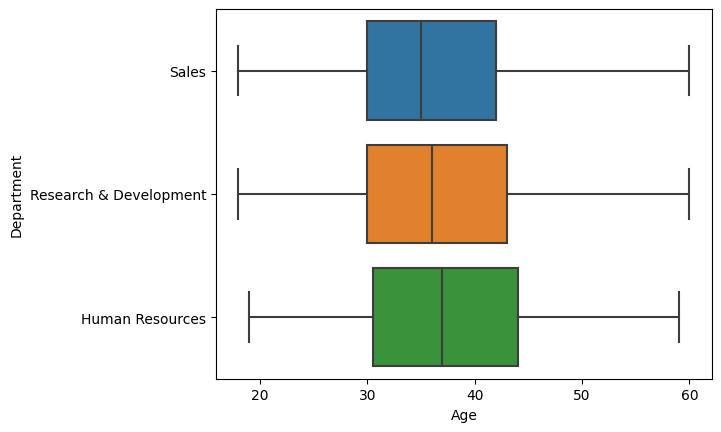

In [78]:
# analisando a idade com o departamento
sns.boxplot(x='Age', y='Department', data=df)

<Axes: xlabel='Department', ylabel='count'>

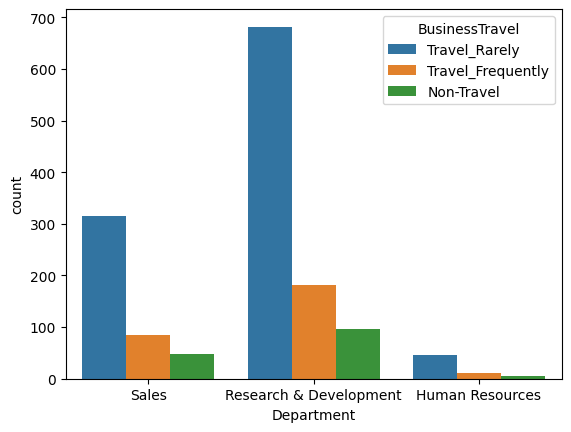

In [79]:
# analisando departamento com a viagem
sns.countplot(x='Department', hue='BusinessTravel', data=df)

<Axes: xlabel='Department', ylabel='Gender'>

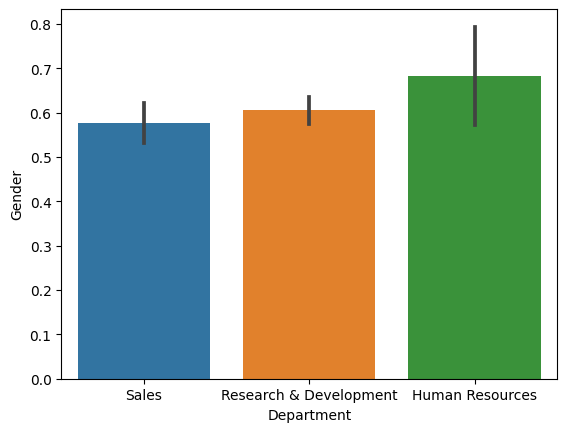

In [80]:
# analisando genero com o departamento
sns.barplot(x='Department', y='Gender', data=df)

### Verificação de Outlier

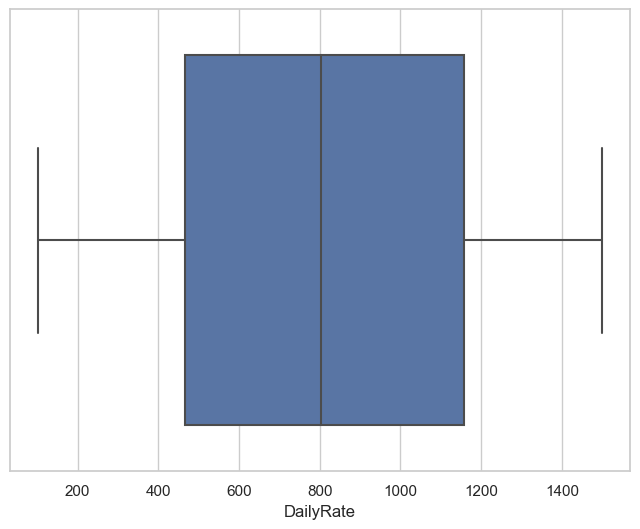

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criar um boxplot
sns.boxplot(x=df['DailyRate'])

# Mostrar o gráfico
plt.show()

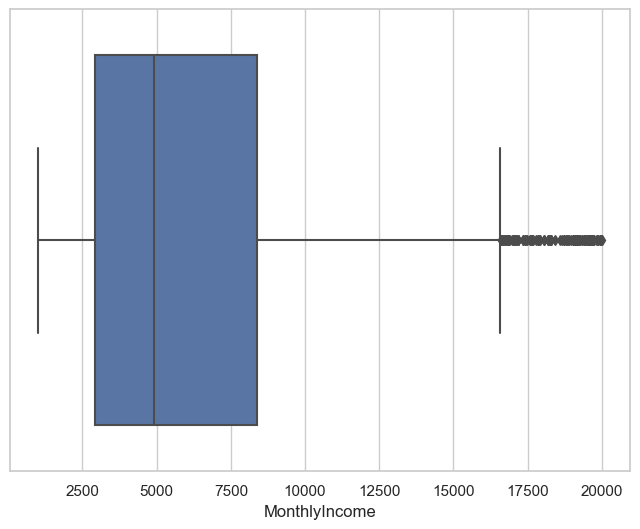

In [84]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criar um boxplot
sns.boxplot(x=df['MonthlyIncome'])

# Mostrar o gráfico
plt.show()

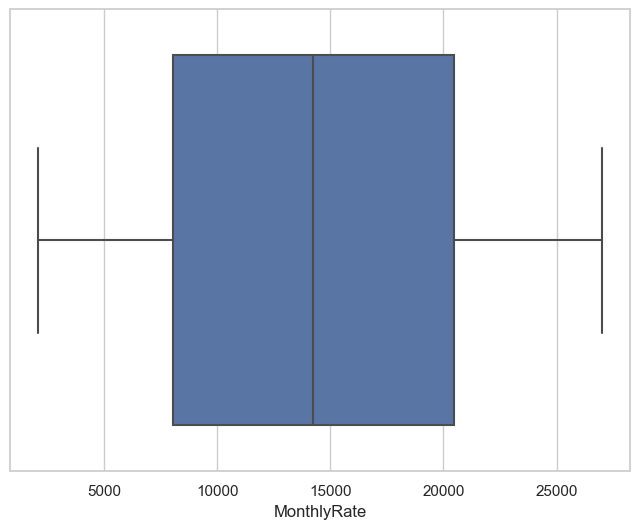

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criar um boxplot
sns.boxplot(x=df['MonthlyRate'])

# Mostrar o gráfico
plt.show()

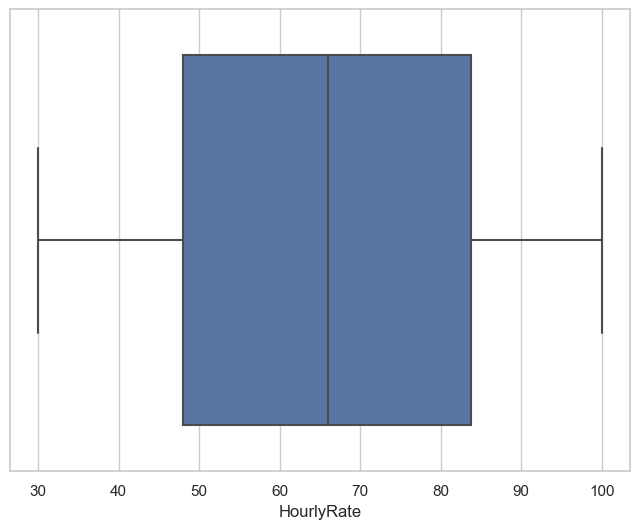

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criar um boxplot
sns.boxplot(x=df['HourlyRate'])

# Mostrar o gráfico
plt.show()

### Normalização

In [88]:
scaler = StandardScaler()
scaler.fit(df[['MonthlyIncome']])
df['MonthlyIncome'] = scaler.transform(df[['MonthlyIncome']])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,-0.108350,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,-0.291719,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,-0.937654,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,-0.763634,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,-0.644858,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Modelagem e treinamento

Com base nos dados e a exploração de dados podemos assumir que o modelo tem alguns dados complexos, sendo assim um modelo de regressão linear já não seria adequado para trabalhar com os dados que temos. Então optei por fazer a modelagem com o `RandomForest` e `DecisionTree`

In [91]:
# separando em treino e teste

X = df.drop(['EmployeeCount', 'MaritalStatus', 'Over18'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
# criando o modelo - RandomForest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train) 

# predizendo os valores
y_pred = rf.predict(X_test)

# avaliando o modelo
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('\nMatriz de Confusão: \n', confusion_matrix(y_test, y_pred))
print('\nRelatório de Classificação: \n', classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'No'

In [ ]:
# criando o modelo - DecisionTree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predizendo os valores
y_pred = dt.predict(X_test)

# avaliando o modelo
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('\nMatriz de Confusão: \n', confusion_matrix(y_test, y_pred))
print('\nRelatório de Classificação: \n', classification_report(y_test, y_pred))
